In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import pandas as pd 
import seaborn as sns

%matplotlib inline

# Correlated Time Series

## Review

We have been modeling stock prices of stock $k$ as Geometric Brownian Motion, 

$$\frac{dS_k}{S_k} = \mu dt + \sigma dW_k,$$

where $\langle dW_k\rangle = 0, \langle dW_k^2\rangle = dt$.
We then included correlation, meaning that the error terms of two stocks may not be independent of each other, as originally assumed:

$$\langle dW_1 dW_2\rangle = \rho_{1,2} dt\ne 0.$$

$\rho_{1,2}$ is called the correlation coefficient betwen 1 and 2.

We proceeded to define the covariance matrix which we could extend to $N$ stocks and allow for more generality, that is, $\sigma_i\ne \sigma_j$ for $i\ne j$.

$$\Sigma = 
\begin{pmatrix}
\sigma_1^2 & \rho_{1,2} \sigma_1\sigma_2 & \dots & \rho_{1,N} \sigma_1\sigma_N  \\ 
\dots & & & \dots \\
\rho_{N,1}\sigma_N\sigma_1  & \dots &\dots & \sigma_N^2
\end{pmatrix}.$$

It is convenient to write this in terms of the covariance, $\sigma_{1,2} = \rho_{1,2}\sigma_1\sigma_2$.

## Single Factor Model

In today's lecture, we have shifted our focus a little bit:
We are considering a time series for excess returns that can be described as

$$R_{i,t}^e = \beta_i F_t + \sigma_i \epsilon_{i,t},$$

where $F_t$ is a time series of the "returns" of one risk factor that all stocks are exposed to in some way. We write $\langle F_t\rangle =\lambda$ and $\langle F_t^2\rangle = \sigma_F^2$.
Their sensitivity to the risk factor is given by their factor loading $\beta_i$. 
We still have the random error term, and by removing the one common risk factor, we assume $\epsilon_{i,t}$ is now truly idiosyncratic.

What is the result of this? 
Now the covariance matrix is 

$$\Sigma = 
\begin{pmatrix}
b_1^2 \sigma_F^2 +\sigma_1^2 & b_1 b_2 \sigma_F^2 & \dots & b_1 b_N \sigma_F^2  \\ 
\dots & & & \dots \\
b_N b_1\sigma_F^2  & \dots &\dots & b_N^2 \sigma_F^2 + \sigma_N^2
\end{pmatrix}.$$

#### Problem 1.
Let's run a little experiment. Let's build three groups of stocks, $N_1=10, N_2=N_3=5$ where the stocks in the first group have $b=0.8$, in the second group $b=0.3$, and in the third group $b=0$.

Assume that $\lambda = 8\times 10^{-4}$, $\sigma_F=3\times 10^{-2}$, and $\sigma_i=2\times10^{-2}$ for all $i$. Generate 100 data points and plot the correlation matrix.

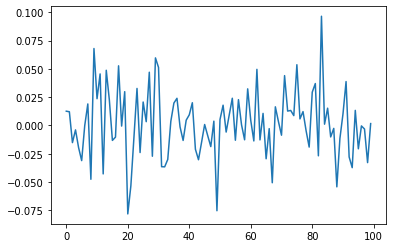

In [23]:
lambda_F = 8e-4
sigma_F = 3e-2
sigma = 2e-2

# Create the factor time series
F = np.random.normal(lambda_F, sigma_F, 100)

returns = {}

# First group
beta1=0.8
for idx in range(10):
    returns[f'stock1_{idx}'] = beta1*F + np.random.normal(0,sigma,100)

# Second group
beta2=0.3
for idx in range(5):
    returns[f'stock2_{idx}'] = beta2*F + np.random.normal(0,sigma,100)
    
# Third group
beta3=0
for idx in range(5):
    returns[f'stock3_{idx}'] = beta3*F + np.random.normal(0,sigma,100)
    
plt.plot(returns['stock1_2'])

# Dump into array
returns_arr = np.array([r for r in returns.values()])



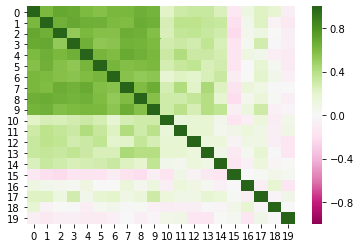

In [24]:
# Plot the correlation matrix.
# vmin and vmax set the color scale.
sns.heatmap(np.corrcoef(returns_arr), cmap="PiYG", vmin=-1, vmax=1)

## Capital Asset Pricing Model as an Example

In the Capital Asset Pricing Model, we attempt to explain stocks' excess returns with the excess returns of the market. Before we go into the finer details of the assumptions, let's run a regression on the returns of Apple stock (\$AAPL). Download the data file for this week's lecture from Blackboard and load it.

Use the command 

```python
df = pd.read_csv("./Data_Lecture_3.csv", index_col=0, parse_dates=True)
```

to create a DataFrame. The file is more comprehensive than what we need for now. It contains the monthly returns of most of the stocks in the S\&P 500 for the last years. In addition, it contains the returns for some sample portfolios -- like the market portfolio --, the risk-free rate and the industrial production and CPI changes. But we'll come to that later.

At its core, the CAPM is a single-factor model, and we're going to treat it like that. Our equation we wish to estimate is

$$R_{AAPL,t}^e = b_{AAPL} F_t + \sigma_{AAPL} \epsilon_{AAPL,t},$$

where we take $F_t$ to be the market portfolio. When we use this approach, then we separate the risk of Apple into two categories: the market risk that we're taking by buying the stock and the risk that is specific to the stock: 

$$b_{AAPL}^2 \sigma_F^2 +\sigma_{\epsilon,C}^2.$$

Let's get to the estimation and interpretation.

#### Problem 2a.

In the first step, select from the DataFrame the columns with Apple's return, the risk-free rate, and the market portfolio return.
Remember: columns are accessed and created using the ```.loc[]``` command. 
The market portfolio return is already net of the risk-free rate, but Apple's return is not. Therefore, let's create a new column "AAPL_E" which is the excess return.

To run a regression to estimate $b_{AAPL}$, we need another module.
If you have not already installed it, get ```statsmodels``` and import it as follows:

```python 
import statsmodels.formula.api as sm
```

The syntax for the regression model is

```python
mod = sm.ols(formula="Y~X", data=df).fit()
mod.summary()
```

which first models and fits $Y_t = a + bX_t + \epsilon_t$ with the data in ```df```, saves the results and outputs a summary table.



In [30]:
df=pd.read_csv('./data/Data_Lecture_3.csv',index_col=0,parse_dates=True)
df.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XYL,YUM,ZBH,ZION,MKT,SMB,HML,RF,CPI,IndProd
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,8.965403,5.617027,1.604202,-15.559467,4.947367,7.786493,7.793523,0.397299,3.687699,4.077818,...,3.016765,-1.707844,11.253543,8.592044,5.57,0.39,0.95,0.0,-0.281588,0.405392
2013-02-28,-7.655023,-6.136895,3.763957,-2.577849,4.403527,-0.265997,3.378099,3.837650,4.302967,11.621178,...,-1.140784,0.828099,0.481413,3.537714,1.29,-0.45,0.03,0.0,-0.209016,-0.172034
2013-03-31,1.459880,23.395607,8.016544,0.285049,8.621657,4.428448,2.142036,10.162677,2.769777,5.703634,...,0.217944,9.408769,0.615394,3.419136,4.03,0.78,-0.29,0.0,0.041407,0.109350
2013-04-30,-1.270848,-0.413346,1.477238,0.027105,5.059334,4.805337,7.999121,3.533298,-5.527490,0.620661,...,0.687039,-4.955616,1.621978,-1.491662,1.55,-2.42,0.63,0.0,0.237758,0.203532
2013-05-31,9.236622,3.887928,-2.853882,2.224061,0.311349,-0.679443,0.819326,-4.933379,5.058140,-4.613367,...,1.797858,-0.544640,2.658907,13.259207,2.80,1.67,2.60,0.0,0.195554,-0.427080


In [37]:
# Returns of AAPL, market portfolio return, risk-free rate
appl_rets = df[['AAPL', 'MKT', 'RF']]
# APPL excess returns
appl_rets['AAPL_E'] = appl_rets['AAPL'] - appl_rets['RF']
appl_rets.head()

/Users/alpakpinar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,AAPL,MKT,RF,AAPL_E
Date,,,,
2013-01-31,-15.559467,5.57,0.0,-15.559467
2013-02-28,-2.577849,1.29,0.0,-2.577849
2013-03-31,0.285049,4.03,0.0,0.285049
2013-04-30,0.027105,1.55,0.0,0.027105
2013-05-31,2.224061,2.80,0.0,2.224061


In [51]:
# Regression
import statsmodels.api as sm

mod = sm.OLS(appl_rets['AAPL_E'], appl_rets['MKT']).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 AAPL_E   R-squared (uncentered):                   0.258
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              28.20
Date:                Fri, 07 Feb 2020   Prob (F-statistic):                    9.37e-07
Time:                        10:10:38   Log-Likelihood:                         -271.17
No. Observations:                  82   AIC:                                      544.3
Df Residuals:                      81   BIC:                                      546.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MKT            1.1060      0.208      5.310      0.000       0.692       1.520
==============================================================================
Omnibus:                       16.283   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.381
Skew:                          -0.899   Prob(JB):                     2.28e-05
Kurtosis:                       4.739   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We want to know find out a couple of things about the behavior of Apple stock. 
<ul>
 <li>How does the excess return of Apple compare to the market? Does it fluctuate more or less?
 <li>Historically, the annual excess return of the market, or market risk premium, has been $\lambda_F=\lambda_{MKT}=6\%$. What annual return do you expect from Apple stock?
 <li>We know that the risk is separated into two parts. Using the "MKT" column in the DataFrame, find an estimate for $\sigma_F^2=\sigma_{MKT}^2$.
 <li>The second part is the error from the residuals, $\sigma_{\epsilon,AAPL}^2$, which can be obtained from the estimated model through ```mod.mse_resid```.
</ul>

To learn more about the errors, make a scatter plot of the excess market returns on the x-axis and Apple's excess returns on the y-axis. The general syntax is ```df.plot.scatter(x=X, y=Y)```.

Text(0, 0.5, 'AAPL_E')

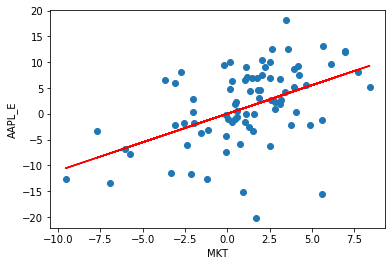

In [57]:
fig, ax = plt.subplots(1,1)
ax.scatter(appl_rets['MKT'], appl_rets['AAPL_E'])
def bestfit(x, slope):
    return slope*x
bestfit_line = bestfit(appl_rets['MKT'], 1.106)
ax.plot(appl_rets['MKT'], bestfit_line, 'r')
ax.set_xlabel('MKT')
ax.set_ylabel('AAPL_E')

Most notably, the CAPM predicts that there is no intercept. Look at your result and check the intercept. Thinking about statistical significance, discuss!

Additionally, for the implications of the CAPM about the factor loading $b$ to make sense for individual stocks, we need to hold a well diversified portfolio. Speaking of which, you should have noticed above that a large part of the risk in holding Apple stock is not market risk, but firm-specific risk. This is not good because an investor who is diversified would have less risk when they add Apple to their portfolio, and therefore, they would be willing to pay more for the stock.

#### Problem 2b.

In that spirit, let's look at the CAPM for a bigger portfolio! Choose the first 80 stocks of the data set, using ```.iloc[:, 0:80]``` (all rows, first 80 columns), and build an equal weight portfolio. That means, each weight is $w_i=1/80$.

Find the excess return of that portfolio, and run it against the excess market return as in 2a.

In [62]:
df_lim = df.iloc[:, 0:80]
df_lim['RF'] = df['RF']
df_lim['MKT'] = df['MKT']
df_lim['Portfolio'] = df_lim.apply(np.mean, axis=1)
df_lim['Portfolio_E'] = df_lim['Portfolio'] - df_lim['RF']

import statsmodels.formula.api as sm
mod = sm.ols("Portfolio_E ~ MKT", data=df_lim).fit()
mod.summary()

/Users/alpakpinar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alpakpinar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alpakpinar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Portfolio_E   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1402.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           1.76e-52
Time:                        10:26:24   Log-Likelihood:                -104.69
No. Observations:                  82   AIC:                             213.4
Df Residuals:                      80   BIC:                             218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0282      0.102     -0.277      0.782      -0.231       0.175
MKT            1.0833      0.029     37.449      0.000       1.026       1.141
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.546
Skew:                          -0.106   Prob(JB):                        0.761
Kurtosis:                       3.338   Cond. No.                         3.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Macroeconomic Factor Models

The Capital Asset Pricing Model is arguably the most important factor model, but it suffers from imperfections. An alternative are multifactor models based on macroeconomic data. If the stock price changes, then maybe this can be explained in an unexpected surprise to macroeconomic conditions to which the firm is sensitive. One simple such model is 

$$R_{i,t}^e = b_{i,CPI} F_{CPI,t} + b_{i,IP} F_{IP,t},$$

where we use the comsumer price index and the industrial production surprises. To get there, we first have to find out those surprises.

Unlike stock returns, these time series have a strong degree of autocorrelation, which means that $CPI_{t-1}$ is very useful in prediction $CPI_t$. Again, we use regression to estimate this relationship. This particular type of model is called AR(1), an autoregression with lag 1. (In reality, we'd have to build a much more sophisticated prediction with more than one lag, for example. But this is good enough for our demonstration.)

#### Problem 3a.
Run the regressions $CPI_t = \beta_{0,CPI} + \beta_{1,CPI} CPI_{t-1} + \epsilon_{CPI,t}$ and $IP_t = \beta_{0,IP} + \beta_{1,IP} IP_{t-1} + \epsilon_{IP,t}$. In creating the lagged variables, you'll find the pandas command ```df.shift()``` useful.

After you estimate ```mod = sm.ols(formula="CPI~CPI_1", data=regr_df).fit()```, you can use ```mod.resid``` to access the error your forecast makes, that is 

$$F_{CPI,t} = CPI_t - (\hat{\beta}_{0,CPI} + \hat{\beta}_{1,CPI} CPI_{t-1})$$

where the hat denotes the regression estimate.



#### Problem 3b.
Using your result from 3a and the excess returns of Apple, estimate the macroeconomic factor model. (Don't be surprised or disheartened by non-sensical or insignificant result. Macroeconomic factor models are known for this, and we didn't even build a sohpisticated one.

## Momentum

The usual approach these days is to enhance the CAPM by the factor SMB (small minus big) and HML (high minus low). These factors are in your data file as well, and they are carefully constructed from firm characteristics.

#### Problem 4a.

Let's see what happens to our result for Apple and estimate

$$R_{AAPL,t}^e = \alpha_{AAPL} + \beta_{AAPL, MKT} R_{MKT,t}^e + \beta_{AAPL, SMB} SMB_t + \beta_{AAPL, HML} HML_t +\epsilon_{AAPL, t}.$$

In particular, look at $R^2$ which measures how much variability of the stock returns the model explains, and the factor loading for the market factor.

There has been some debate about a so-called momentum factor. Taking our idea from the autoregression of the macroeconomic factors, we want to look of the stock returns -- unexpected to our efficient market hypothesis -- have maybe a little bit of predictive content. The argument is that this tiny bit of content over time is very useful, although it does not offer any consistent effect in the short run.

#### Problem 4b.

Estimate 

$$R_{AAPL,t}^e = \beta_{0,AAPL} + \beta_{1,AAPL} R_{AAPL,t-1}^e + \epsilon_{AAPL,t}.$$

#### Outlook to the Homework.

The momentum strategy builds on the observation that trends persist in some way or another. In your homework, you will therefore try to build a momentum factor (To make it a little more managable, we will restrict ourselves to the stocks of 10 companies, which you may choose at random. This will bias our results, but the procedure is what we're trying to understand.)

If we get through the material faster, here are the steps outlined for you to try and go ahead:
<ul>
<li>Each month, rank the stocks by performance based on their return from best to worst.
<li>Put the 30\% best stock in a portfolio with weights $1/30$ each, and also include the 30\% worst stock in there with weights $-1/30$ each. This means we go long the previous winners and sell short the previous losers.
This portfolio is your factor! (In reality, we need to construct it more carefully, taking into account the presence of the factors SMB and HML, too.)
<li>Run a regression for each stock including your new momentum factor, which will give you a bunch of $\beta_{i,MOM}$.
<li>Determine the average return of each asset, $\langle R_{i,t}^e\rangle.$ Now you have two lists: The average returns and the betas. Run a regression to find $\lambda$.
</ul>

This procedure is called Fama-MacBeth regression.